KNN Assignment on Amazon Fine Food Reviews:
By: Madhusudan Chandak

KNN Approaches:
    1. Brute Force
    2. KD Tree
Vectorize / Featurize method:
    1. BOW
    2. TFIDF
    3. W2V
    4. TFIDF W2V
    

In [3]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import cross_validation
from sklearn.metrics import f1_score
import sqlite3
import nltk
import string
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
from sklearn.decomposition import TruncatedSVD
from tqdm import tqdm
import os

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [4]:
if os.path.isfile('final.sqlite'):
    conn = sqlite3.connect('final.sqlite')
    final = pd.read_sql_query(""" SELECT * FROM Reviews WHERE Score !=3 limit 80000""", conn)
    conn.close()
else:
    print("Please the above cell")

In [5]:
print (final.sort_values('Time'))

        index      Id   ProductId          UserId  \
0      138706  150524  0006641040   ACITT7DI6IDDL   
30     138683  150501  0006641040   AJ46FKXOVC7NR   
424    417839  451856  B00004CXX9   AIUWLEQ1ADEG5   
330    346055  374359  B00004CI84  A344SMIA5JECGM   
423    417838  451855  B00004CXX9   AJH6LUC1UT1ON   
245    346116  374422  B00004CI84  A1048CYU0OV4O8   
308    346041  374343  B00004CI84   A1B2IZU1JLZA6   
215     70688   76882  B00002N8SM  A32DW342WBJ6BX   
261    346141  374450  B00004CI84   ACJR7EQF9S6FP   
325    346094  374400  B00004CI84  A2DEE7F9XKP3ZR   
427    417883  451903  B00004CXX9  A2DEE7F9XKP3ZR   
241      1146    1245  B00002Z754  A29Z5PI9BW2PU3   
242      1145    1244  B00002Z754  A3B8RCEI0FXFI6   
485    121041  131217  B00004RAMX   A5NQLNC6QPGSI   
868    138017  149789  B00004S1C6  A1KXONFPU2XQ5K   
837    138001  149770  B00004S1C5  A1KXONFPU2XQ5K   
249    346115  374421  B00004CI84  A1FJOY14X3MUHE   
296    346102  374408  B00004CI84  A1GB1Q193DN

[80000 rows x 12 columns]


In [6]:
print (final.shape)

(80000, 12)


In [7]:
print(final['CleanedText'].values)

['witti littl book make son laugh loud recit car drive along alway sing refrain hes learn whale india droop love new word book introduc silli classic book will bet son still abl recit memori colleg'
 'grew read sendak book watch realli rosi movi incorpor love son love howev miss hard cover version paperback seem kind flimsi take two hand keep page open'
 'fun way children learn month year learn poem throughout school year like handmot invent poem'
 ...
 'found small can local kroger like small much better deal tasti snack'
 'love snack tasti also qualiti realli good get yummi snack'
 'asian rice cracker mix basic one greater varieti cracker also quit bit larger use one size big gumbal perhap reason instead packag bag cracker simpli burst flavor scare eat whole singl sit']


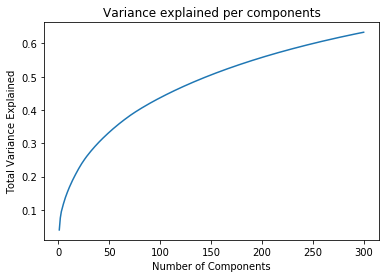

In [12]:
#Using BOW to vectorize

trainX_data=final['CleanedText'].values[0:51200]
testX_data= final['CleanedText'].values[64000:]
cvX_data=final['CleanedText'].values[51200:64000]
trainY_data=final['Score'].values[0:51200]
testY_data=final['Score'].values[64000:]
cvY_data=final['Score'].values[51200:64000]

#Vectorising train data
count_vect = CountVectorizer()
final_counts_train = count_vect.fit_transform(trainX_data)
feature=count_vect.get_feature_names()
#Reducing dimensions of a sparse matrix usind Truncated SVD
svd = TruncatedSVD(n_components=300, n_iter=10, random_state=42)
final_counts_train=svd.fit_transform(final_counts_train)

#print(svd.explained_variance_ratio_)
features=np.arange(1, 301, 1)
#print(features)
Variance_explained=svd.explained_variance_ratio_
cnt=0.0
total_variance=[]
for i in (Variance_explained):
    cnt=cnt+i
    total_variance.append(cnt)

plt.figure()
plt.title("Variance explained per components")
plt.plot(features,total_variance)
plt.xlabel("Number of Components")
plt.ylabel("Total Variance Explained")
plt.show()

with open('BOWfinal_feature_names.pkl', 'wb') as f:
    pickle.dump(feature, f)

with open('BOWfinal_traindata_counts_Further_Use.pkl', 'wb') as f:
    pickle.dump(final_counts_train, f)
    
#Vectorising cross validation data
final_counts_cv=count_vect.transform(cvX_data)
final_counts_cv=svd.fit_transform(final_counts_cv)
#Vectorising test data
final_counts_test=count_vect.transform(testX_data)
final_counts_test=svd.fit_transform(final_counts_test)


In [13]:
X_train=final_counts_train
X_test =final_counts_test
X_cv=final_counts_cv
y_train=trainY_data
y_test=testY_data
y_cv=cvY_data

In [14]:

#Saving all the data for further use
with open('BOWfinal_Train_X.pkl', 'wb') as f:
    pickle.dump(X_train, f)
with open('BOWfinal_Train_Y.pkl', 'wb') as f:
    pickle.dump(y_train, f)
with open('BOWfinal_CV_X.pkl', 'wb') as f:
    pickle.dump(X_cv, f)
with open('BOWfinal_CV_Y.pkl', 'wb') as f:
    pickle.dump(y_cv, f)
with open('BOWfinal_Test_X.pkl', 'wb') as f:
    pickle.dump(X_test, f)
with open('BOWfinal_Test_Y.pkl', 'wb') as f:
    pickle.dump(y_test, f)

In [15]:
%matplotlib inline

#print(X_train.shape)

accuracy=0.0
neigh=1
f1score=0.0
kvalues=[]
trainerror=[]
cverror=[]

#Finding best parameters using Simple Cross Validation
for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='brute')

    # fitting the model on crossvalidation train
    knn.fit(X_train, y_train)

    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv)
    predtrain= knn.predict(X_train)
    # evaluate CV accuracy
    accurtrain=accuracy_score(y_train, predtrain, normalize=True)
    accur = accuracy_score(y_cv, pred, normalize=True)
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))
    f1=f1_score(y_cv, pred, average='binary',pos_label='positive')
    print('\nCV f1_score for k = %d is %.10f' % (i, f1))
    err=1-accur
    errtrain=1-accurtrain
    print("Error value : %.5f"%(err))
    print("Train error : %.5f"%(errtrain))
    cverror.append(err)
    trainerror.append(errtrain)
    kvalues.append(i)
    #if (accuracy<=acc):
    #   accuracy=acc
    #    neigh=i
    #else:
    #    pass
    if (f1score<=f1):
        f1score=f1
        neigh=i
    else:
        pass
plt.plot(kvalues,cverror,'g',label='cverror')
plt.plot(kvalues,trainerror,'r',label='trainerror')
plt.title("Error Graph <Train and CV error>")
plt.xlabel('K values')
plt.ylabel('Error')
plt.legend()
plt.show()


MemoryError: 

In [ ]:
print("The most optimal value of k is %d" %(neigh))
knn = KNeighborsClassifier(n_neighbors=neigh,algorithm='brute')
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = %d is %d%%' % (neigh,acc))
f1=f1_score(y_test, pred,average='binary',pos_label='positive')
print('\n Test f1_score for k = %d is %.10f' % (neigh, f1))
cm=confusion_matrix(y_test,pred)
df_cm = pd.DataFrame(cm,index=["negative","positive"],columns=["negative","positive"])
plt.figure()
plt.title("Confusion matrix")
sns.heatmap(df_cm, annot=True,fmt="d"

In [ ]:
#creating the model with BOW and KDD KNN
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
print("Running KNN using KD Tree on BOW ")

accuracy=0.0
neigh=1
f1score=0.0
kvalues=[]
trainerror=[]
cverror=[]

#Finding best parameters using Simple Cross Validation
for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree')

    # fitting the model on crossvalidation train
    knn.fit(X_train, y_train)

    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv)
    predtrain= knn.predict(X_train)
    # evaluate CV accuracy
    accurtrain=accuracy_score(y_train, predtrain, normalize=True)
    accur = accuracy_score(y_cv, pred, normalize=True)
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))
    f1=f1_score(y_cv, pred, average='binary',pos_label='positive')
    print('\nCV f1_score for k = %d is %.10f' % (i, f1))
    err=1-accur
    errtrain=1-accurtrain
    print("Error value : %.5f"%(err))
    print("Train error : %.5f"%(errtrain))
    cverror.append(err)
    trainerror.append(errtrain)
    kvalues.append(i)
    #if (accuracy<=acc):
    #   accuracy=acc
    #    neigh=i
    #else:
    #    pass
    if (f1score<=f1):
        f1score=f1
        neigh=i
    else:
        pass
plt.plot(kvalues,cverror,'g',label='cverror')
plt.plot(kvalues,trainerror,'r',label='trainerror')
plt.title("Error Graph <Train and CV error>")
plt.xlabel('K values')
plt.ylabel('Error')
plt.legend()
plt.show()


In [ ]:
print("The most optimal value of k is %d" %(neigh))
knn = KNeighborsClassifier(n_neighbors=neigh,algorithm='kd_tree')
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = %d is %d%%' % (neigh,acc))
f1=f1_score(y_test, pred,average='binary',pos_label='positive')
print('\n Test f1_score for k = %d is %.10f' % (neigh, f1))
cm=confusion_matrix(y_test,pred)
df_cm = pd.DataFrame(cm,index=["negative","positive"],columns=["negative","positive"])
plt.figure()
plt.title("Confusion matrix")
sns.heatmap(df_cm, annot=True,fmt="d")


In [ ]:
import warnings
warnings.filterwarnings("ignore")
#Vectorizing using TFIDF
#TF IDF Vectorizing


trainX_data=final['CleanedText'].values[0:46400]
testX_data= final['CleanedText'].values[58000:70000]
cvX_data=final['CleanedText'].values[46400:58000]
trainY_data=final['Score'].values[0:46400]
testY_data=final['Score'].values[58000:70000]
cvY_data=final['Score'].values[46400:58000]


tf_idf_vect = TfidfVectorizer(max_features=2000,min_df=50)
final_tf_idf_train = tf_idf_vect.fit_transform(trainX_data)
#Reducing dimensions of a sparse matrix usind Truncated SVD
svd = TruncatedSVD(n_components=300, n_iter=10, random_state=42)
final_tf_idf_train=svd.fit_transform(final_tf_idf_train)

#print(svd.explained_variance_ratio_)
features=np.arange(1, 301, 1)
#print(features)
Variance_explained=svd.explained_variance_ratio_
cnt=0.0
total_variance=[]
for i in (Variance_explained):
    cnt=cnt+i
    total_variance.append(cnt)

plt.figure()
plt.title("Variance explained per components")
plt.plot(features,total_variance)
plt.xlabel("Number of Components")
plt.ylabel("Total Variance Explained")
plt.show()


feature=tf_idf_vect.get_feature_names()

with open('TFIDFfinal_feature_names.pkl', 'wb') as f:
    pickle.dump(feature, f)
    
final_tf_idf_test=tf_idf_vect.transform(testX_data)
final_tf_idf_test=svd.transform(final_tf_idf_test)
 

final_tf_idf_cv=tf_idf_vect.transform(cvX_data)
final_tf_idf_cv=svd.transform(final_tf_idf_cv)
  



In [ ]:
import warnings
warnings.filterwarnings("ignore")
X_train=final_tf_idf_train
X_test =final_tf_idf_test
X_cv=final_tf_idf_cv
y_train=trainY_data
y_test=testY_data
y_cv=cvY_data

In [ ]:
import warnings
warnings.filterwarnings("ignore")
#creating the model with TFIDF and brute force KNN

#Saving all the data for further use
with open('TFIDFfinal_Train_X.pkl', 'wb') as f:
    pickle.dump(X_train, f)
with open('TFIDFfinal_Train_Y.pkl', 'wb') as f:
    pickle.dump(y_train, f)
with open('TFIDFfinal_CV_X.pkl', 'wb') as f:
    pickle.dump(X_cv, f)
with open('TFIDFfinal_CV_Y.pkl', 'wb') as f:
    pickle.dump(y_cv, f)
with open('TFIDFfinal_Test_X.pkl', 'wb') as f:
    pickle.dump(X_test, f)
with open('TFIDFfinal_Test_Y.pkl', 'wb') as f:
    pickle.dump(y_test, f)

    

In [ ]:
import warnings
warnings.filterwarnings("ignore")

print("Running KNN using Brute Force on TFIDF Vectorized data")


accuracy=0.0
neigh=1
f1score=0.0
kvalues=[]
trainerror=[]
cverror=[]

#Finding best parameters using Simple Cross Validation
for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='brute')

    # fitting the model on crossvalidation train
    knn.fit(X_train, y_train)

    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv)
    predtrain= knn.predict(X_train)
    # evaluate CV accuracy
    accurtrain=accuracy_score(y_train, predtrain, normalize=True)
    accur = accuracy_score(y_cv, pred, normalize=True)
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))
    f1=f1_score(y_cv, pred, average='binary',pos_label='positive')
    print('\nCV f1_score for k = %d is %.10f' % (i, f1))
    err=1-accur
    errtrain=1-accurtrain
    print("Error value : %.5f"%(err))
    print("Train error : %.5f"%(errtrain))
    cverror.append(err)
    trainerror.append(errtrain)
    kvalues.append(i)
    #if (accuracy<=acc):
    #   accuracy=acc
    #    neigh=i
    #else:
    #    pass
    if (f1score<=f1):
        f1score=f1
        neigh=i
    else:
        pass
plt.plot(kvalues,cverror,'g',label='cverror')
plt.plot(kvalues,trainerror,'r',label='trainerror')
plt.title("Error Graph <Train and CV error>")
plt.xlabel('K values')
plt.ylabel('Error')
plt.legend()
plt.show()



In [ ]:
print ("The optimal value of k is %d"%(neigh))   
knn = KNeighborsClassifier(n_neighbors=neigh,algorithm='brute')
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = %d is %d%%' % (neigh,acc))
f1=f1_score(y_test, pred,average='binary',pos_label='positive')
print('\n Test f1_score for k = %d is %.10f' % (neigh, f1))
cm=confusion_matrix(y_test,pred)
df_cm = pd.DataFrame(cm,index=["negative","positive"],columns=["negative","positive"])
plt.figure()
plt.title("Confusion matrix")
sns.heatmap(df_cm, annot=True,fmt="d")

In [ ]:
import warnings
warnings.filterwarnings("ignore")
print("Running KNN using KD Tree on TFIDF Vectorized data")


accuracy=0.0
neigh=1
f1score=0.0
kvalues=[]
trainerror=[]
cverror=[]

#Finding best parameters using Simple Cross Validation
for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree')

    # fitting the model on crossvalidation train
    knn.fit(X_train, y_train)

    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv)
    predtrain= knn.predict(X_train)
    # evaluate CV accuracy
    accurtrain=accuracy_score(y_train, predtrain, normalize=True)
    accur = accuracy_score(y_cv, pred, normalize=True)
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))
    f1=f1_score(y_cv, pred, average='binary',pos_label='positive')
    print('\nCV f1_score for k = %d is %.10f' % (i, f1))
    err=1-accur
    errtrain=1-accurtrain
    print("Error value : %.5f"%(err))
    print("Train error : %.5f"%(errtrain))
    cverror.append(err)
    trainerror.append(errtrain)
    kvalues.append(i)
    #if (accuracy<=acc):
    #   accuracy=acc
    #    neigh=i
    #else:
    #    pass
    if (f1score<=f1):
        f1score=f1
        neigh=i
    else:
        pass
plt.plot(kvalues,cverror,'g',label='cverror')
plt.plot(kvalues,trainerror,'r',label='trainerror')
plt.title("Error Graph <Train and CV error>")
plt.xlabel('K values')
plt.ylabel('Error')
plt.legend()
plt.show()




In [ ]:
print ("The optimal value of k is %d"%(neigh))   
knn = KNeighborsClassifier(n_neighbors=neigh,algorithm='kd_tree')
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = %d is %d%%' % (neigh,acc))
f1=f1_score(y_test, pred,average='binary',pos_label='positive')
print('\n Test f1_score for k = %d is %.10f' % (neigh, f1))
cm=confusion_matrix(y_test,pred)
df_cm = pd.DataFrame(cm,index=["negative","positive"],columns=["negative","positive"])
plt.figure()
plt.title("Confusion matrix")
sns.heatmap(df_cm, annot=True,fmt="d")

In [ ]:
till    here i have run

In [8]:
import warnings
warnings.filterwarnings("ignore")
#Creating W2V model
#WORD TO VECTOR
datawtovtrain = final['CleanedText'].values[0:51200]

i=0
list_of_sent=[]
for sent in datawtovtrain:
    list_of_sent.append(sent.split())
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

sent_vectors_train = []; 
for sent in tqdm(list_of_sent): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
    sent_vectors_train.append(sent_vec)
print(len(sent_vectors_train))
W2VScoretrain=final['Score'].values[0:51200]


number of words that occured minimum 5 times  9691
sample words  ['littl', 'book', 'make', 'son', 'laugh', 'loud', 'recit', 'car', 'drive', 'along', 'alway', 'sing', 'refrain', 'hes', 'learn', 'whale', 'india', 'droop', 'love', 'new', 'word', 'introduc', 'silli', 'classic', 'will', 'bet', 'still', 'abl', 'memori', 'colleg', 'grew', 'read', 'sendak', 'watch', 'realli', 'rosi', 'movi', 'incorpor', 'howev', 'miss', 'hard', 'cover', 'version', 'paperback', 'seem', 'kind', 'flimsi', 'take', 'two', 'hand']


100%|███████████████████████████████████████████████████████████████████████████| 51200/51200 [01:25<00:00, 598.47it/s]


51200


In [9]:
import warnings
warnings.filterwarnings("ignore")
#Creating W2V model
#WORD TO VECTOR
datawtovcv = final['CleanedText'].values[51200:64000]

i=0
list_of_sent=[]
for sent in datawtovcv:
    list_of_sent.append(sent.split())
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

sent_vectors_cv = []; 
for sent in tqdm(list_of_sent): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
    sent_vectors_cv.append(sent_vec)
print(len(sent_vectors_cv))
W2VScorecv=final['Score'].values[51200:64000]


number of words that occured minimum 5 times  4496
sample words  ['best', 'granola', 'bar', 'ever', 'plus', 'got', 'sale', 'made', 'even', 'better', 'get', 'children', 'eat', 'littl', 'bit', 'fiber', 'realli', 'good', 'cours', 'almond', 'mix', 'nut', 'flavor', 'would', 'give', 'five', 'star', 'found', 'like', 'roast', 'peanut', 'fantast', 'snack', 'sweet', 'crunchi', 'chewi', 'nutti', 'salti', 'usual', 'hate', 'love', 'fan', 'tri', 'recent', 'one', 'breakfast', 'minut', 'ago', 'matter', 'fact']


100%|██████████████████████████████████████████████████████████████████████████| 12800/12800 [00:11<00:00, 1110.51it/s]


12800


In [10]:
import warnings
warnings.filterwarnings("ignore")
#Creating W2V model
#WORD TO VECTOR
datawtovtest = final['CleanedText'].values[64000:]


i=0
list_of_sent=[]
for sent in datawtovtest:
    list_of_sent.append(sent.split())
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

sent_vectors_test = []; 
for sent in tqdm(list_of_sent): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
    sent_vectors_test.append(sent_vec)
print(len(sent_vectors_test))
W2VScoretest=final['Score'].values[64000:]


number of words that occured minimum 5 times  4917
sample words  ['tortellini', 'dri', 'graini', 'come', 'small', 'box', 'couldnt', 'eat', 'flavor', 'strong', 'good', 'end', 'donat', 'remain', 'bought', 'time', 'ago', 'amazon', 'back', 'davinci', 'tri', 'barilla', 'brand', 'find', 'quit', 'tasti', 'lack', 'filler', 'use', 'great', 'butter', 'grate', 'chees', 'various', 'sauc', 'make', 'yummi', 'italian', 'salad', 'cut', 'hard', 'salami', 'chunk', 'pickl', 'veggi', 'marin', 'artichok', 'oliv', 'love', 'eas']


100%|██████████████████████████████████████████████████████████████████████████| 16000/16000 [00:12<00:00, 1260.63it/s]


16000


In [11]:
import warnings
warnings.filterwarnings("ignore")

#Train Test Split of W2V data
#creating the model with W2V and brute force KNN
X_train = sent_vectors_train
X_cv=sent_vectors_cv
X_test = sent_vectors_test
Y_train = W2VScoretrain
Y_cv = W2VScorecv
Y_test = W2VScoretest
abc=np.where(np.isnan(X_train))
np.shape(abc)



(2, 0)

In [111]:

#Saving all the data for further use
with open('W2Vfinal_Train_X.pkl', 'wb') as f:
    pickle.dump(X_train, f)
with open('W2Vfinal_Train_Y.pkl', 'wb') as f:
    pickle.dump(Y_train, f)
with open('W2Vfinal_CV_X.pkl', 'wb') as f:
    pickle.dump(X_cv, f)
with open('W2Vfinal_CV_Y.pkl', 'wb') as f:
    pickle.dump(Y_cv, f)
with open('W2Vfinal_Test_X.pkl', 'wb') as f:
    pickle.dump(X_test, f)
with open('W2Vfinal_Test_Y.pkl', 'wb') as f:
    pickle.dump(Y_test, f)


In [12]:
import warnings
warnings.filterwarnings("ignore")
#Brute Force KNN on W2V
print("Running KNN using Brute Force on W2V Vectorized data")
accuracy=0.0
neigh=1
f1score=0.0
kvalues=[]
error=[]
#Finding best parameters using Simple Cross Validation
for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='brute')

    # fitting the model on crossvalidation train
    knn.fit(X_train, Y_train)

    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv)

    # evaluate CV accuracy
    accu=accuracy_score(Y_cv, pred, normalize=True)
    acc = accuracy_score(Y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))
    f1=f1_score(Y_cv, pred, average='binary',pos_label='positive')
    print('\nCV f1_score for k = %d is %.10f' % (i, f1))
    #calculating error
    err=1-accu
    print("Error value : %.5f"%(err))
    error.append(err)
    kvalues.append(i)
    
    if (f1score<=f1):
        f1score=f1
        neigh=i
    else:
        pass

plt.figure()
plt.plot(kvalues,error)
plt.title("Error Graph")
plt.xlabel('K values')
plt.ylabel('Error')
plt.show()   
print ("The optimal value of k is %d"%(neigh))   
knn = KNeighborsClassifier(n_neighbors=neigh,algorithm='brute')
knn.fit(X_train,Y_train)
pred = knn.predict(X_test)
acc = accuracy_score(Y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = %d is %d%%' % (neigh,acc))
f1=f1_score(Y_test, pred,average='binary',pos_label='positive')
print('\n Test f1_score for k = %d is %.10f' % (neigh, f1))
cm=confusion_matrix(Y_test,pred)
df_cm = pd.DataFrame(cm,index=["negative","positive"],columns=["negative","positive"])
plt.figure()
plt.title("Confusion matrix")
sns.heatmap(df_cm, annot=True,fmt="d")


Running KNN using Brute Force on W2V Vectorized data


KeyboardInterrupt: 

In [14]:
import warnings
warnings.filterwarnings("ignore")
print("Running KNN using KD Tree on W2V Vectorized data")

accuracy=0.0
neigh=1
f1score=0.0
kvalues=[]
error=[]
#Finding best parameters using Simple Cross Validation
for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree')

    # fitting the model on crossvalidation train
    knn.fit(X_train, Y_train)

    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv)

    # evaluate CV accuracy
    accu=accuracy_score(Y_cv, pred, normalize=True)
    acc = accuracy_score(Y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))
    f1=f1_score(Y_cv, pred, average='binary',pos_label='positive')
    print('\nCV f1_score for k = %d is %.10f' % (i, f1))
    #calculating error
    err=1-accu
    print("Error value : %.5f"%(err))
    error.append(err)
    kvalues.append(i)
    
    if (f1score<=f1):
        f1score=f1
        neigh=i
    else:
        pass

plt.figure()
plt.plot(kvalues,error)
plt.title("Error Graph")
plt.xlabel('K values')
plt.ylabel('Error')
plt.show()   
print ("The optimal value of k is %d"%(neigh))   
knn = KNeighborsClassifier(n_neighbors=neigh,algorithm='kd_tree')
knn.fit(X_train,Y_train)
pred = knn.predict(X_test)
acc = accuracy_score(Y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = %d is %d%%' % (neigh,acc))
f1=f1_score(Y_test, pred,average='binary',pos_label='positive')
print('\n Test f1_score for k = %d is %.10f' % (neigh, f1))
cm=confusion_matrix(Y_test,pred)
df_cm = pd.DataFrame(cm,index=["negative","positive"],columns=["negative","positive"])
plt.figure()
plt.title("Confusion matrix")
sns.heatmap(df_cm, annot=True,fmt="d")


Running KNN using KD Tree on W2V Vectorized data

CV accuracy for k = 1 is 71%

CV f1_score for k = 1 is 0.8225058005
Error value : 0.28687


KeyboardInterrupt: 

In [114]:
import warnings
warnings.filterwarnings("ignore")
#Creating W2V model
#WORD TO VECTOR
datawtovtrain = final['CleanedText'].values[0:51200]

i=0
list_of_sent=[]
for sent in datawtovtrain:
    list_of_sent.append(sent.split())
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

sent_vectors_train = []; 
for sent in tqdm(list_of_sent): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
    sent_vectors_train.append(sent_vec)
print(len(sent_vectors_train))
W2VScoretrain=final['Score'].values[0:51200]


number of words that occured minimum 5 times  9691
sample words  ['littl', 'book', 'make', 'son', 'laugh', 'loud', 'recit', 'car', 'drive', 'along', 'alway', 'sing', 'refrain', 'hes', 'learn', 'whale', 'india', 'droop', 'love', 'new', 'word', 'introduc', 'silli', 'classic', 'will', 'bet', 'still', 'abl', 'memori', 'colleg', 'grew', 'read', 'sendak', 'watch', 'realli', 'rosi', 'movi', 'incorpor', 'howev', 'miss', 'hard', 'cover', 'version', 'paperback', 'seem', 'kind', 'flimsi', 'take', 'two', 'hand']


100%|███████████████████████████████████████████████████████████████████████████| 51200/51200 [00:55<00:00, 916.50it/s]


51200


In [115]:
#TFIDF WEIGHTED W2V
import warnings
warnings.filterwarnings("ignore")

datatfidftrain = final['CleanedText'].values[0:51200]

model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(datatfidftrain)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [116]:
import warnings
warnings.filterwarnings("ignore")
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names


tfidf_sent_vectors_train = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]

            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors_train.append(sent_vec)
    row += 1
TFIDFW2VScoretrain=final['Score'].values[0:51200]


100%|███████████████████████████████████████████████████████████████████████████| 51200/51200 [01:13<00:00, 700.08it/s]


In [117]:
import warnings
warnings.filterwarnings("ignore")
#Creating W2V model
#WORD TO VECTOR
datawtovcv = final['CleanedText'].values[51200:64000]

i=0
list_of_sent=[]
for sent in datawtovcv:
    list_of_sent.append(sent.split())
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

sent_vectors_cv = []; 
for sent in tqdm(list_of_sent): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
    sent_vectors_cv.append(sent_vec)
print(len(sent_vectors_cv))
W2VScorecv=final['Score'].values[51200:64000]


number of words that occured minimum 5 times  4496
sample words  ['best', 'granola', 'bar', 'ever', 'plus', 'got', 'sale', 'made', 'even', 'better', 'get', 'children', 'eat', 'littl', 'bit', 'fiber', 'realli', 'good', 'cours', 'almond', 'mix', 'nut', 'flavor', 'would', 'give', 'five', 'star', 'found', 'like', 'roast', 'peanut', 'fantast', 'snack', 'sweet', 'crunchi', 'chewi', 'nutti', 'salti', 'usual', 'hate', 'love', 'fan', 'tri', 'recent', 'one', 'breakfast', 'minut', 'ago', 'matter', 'fact']


100%|██████████████████████████████████████████████████████████████████████████| 12800/12800 [00:07<00:00, 1601.39it/s]


12800


In [118]:
#TFIDF WEIGHTED W2V
import warnings
warnings.filterwarnings("ignore")

datatfidfcv = final['CleanedText'].values[51200:64000]
model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(datatfidfcv)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [119]:
import warnings
warnings.filterwarnings("ignore")
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names


tfidf_sent_vectors_cv = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors_cv.append(sent_vec)
    row += 1
print(len(tfidf_sent_vectors_cv))
TFIDFW2VScorecv=final['Score'].values[51200:64000]

100%|██████████████████████████████████████████████████████████████████████████| 12800/12800 [00:10<00:00, 1217.83it/s]


12800


In [120]:
import warnings
warnings.filterwarnings("ignore")
#Creating W2V model
#WORD TO VECTOR
datawtovtest = final['CleanedText'].values[64000:]


i=0
list_of_sent=[]
for sent in datawtovtest:
    list_of_sent.append(sent.split())
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

sent_vectors_test = []; 
for sent in tqdm(list_of_sent): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
    sent_vectors_test.append(sent_vec)
print(len(sent_vectors_test))
W2VScoretest=final['Score'].values[64000:]


number of words that occured minimum 5 times  4917
sample words  ['tortellini', 'dri', 'graini', 'come', 'small', 'box', 'couldnt', 'eat', 'flavor', 'strong', 'good', 'end', 'donat', 'remain', 'bought', 'time', 'ago', 'amazon', 'back', 'davinci', 'tri', 'barilla', 'brand', 'find', 'quit', 'tasti', 'lack', 'filler', 'use', 'great', 'butter', 'grate', 'chees', 'various', 'sauc', 'make', 'yummi', 'italian', 'salad', 'cut', 'hard', 'salami', 'chunk', 'pickl', 'veggi', 'marin', 'artichok', 'oliv', 'love', 'eas']


100%|██████████████████████████████████████████████████████████████████████████| 16000/16000 [00:09<00:00, 1661.17it/s]


16000


In [121]:
#TFIDF WEIGHTED W2V
import warnings
warnings.filterwarnings("ignore")

datatfidftest = final['CleanedText'].values[64000:]
model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(datatfidftest)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [122]:
import warnings
warnings.filterwarnings("ignore")
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names


tfidf_sent_vectors_test = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors_test.append(sent_vec)
    row += 1
TFIDFW2VScoretest=final['Score'].values[64000:]


100%|██████████████████████████████████████████████████████████████████████████| 16000/16000 [00:13<00:00, 1195.91it/s]


In [123]:
import warnings
warnings.filterwarnings("ignore")
#Train Test Split of TFIDF W2V data
#creating the model with TFIDF W2V and brute force KNN
X_train = tfidf_sent_vectors_train
X_test = tfidf_sent_vectors_test
X_cv = tfidf_sent_vectors_cv
Y_train = TFIDFW2VScoretrain
Y_test = TFIDFW2VScoretest
Y_cv =TFIDFW2VScorecv





In [124]:
with open('TFIDFW2Vfinal_Train_X.pkl', 'wb') as f:
    pickle.dump(X_train, f)
with open('TFIDFW2Vfinal_Train_Y.pkl', 'wb') as f:
    pickle.dump(Y_train, f)
with open('TFIDFW2Vfinal_CV_X.pkl', 'wb') as f:
    pickle.dump(X_cv, f)
with open('TFIDFW2Vfinal_CV_Y.pkl', 'wb') as f:
    pickle.dump(Y_cv, f)
with open('TFIDFW2Vfinal_Test_X.pkl', 'wb') as f:
    pickle.dump(X_test, f)
with open('TFIDFW2Vfinal_Test_Y.pkl', 'wb') as f:
    pickle.dump(Y_test, f)

Running KNN using bRUTE FORCE on TFIDF W2V Vectorized data

CV accuracy for k = 1 is 74%

CV f1_score for k = 1 is 0.8448775850
Error value : 0.25492

CV accuracy for k = 3 is 78%

CV f1_score for k = 3 is 0.8776991472
Error value : 0.21062

CV accuracy for k = 5 is 80%

CV f1_score for k = 5 is 0.8918954886
Error value : 0.19039

CV accuracy for k = 7 is 82%

CV f1_score for k = 7 is 0.9001006432
Error value : 0.17836

CV accuracy for k = 9 is 83%

CV f1_score for k = 9 is 0.9066597430
Error value : 0.16852

CV accuracy for k = 11 is 83%

CV f1_score for k = 11 is 0.9105914718
Error value : 0.16250

CV accuracy for k = 13 is 84%

CV f1_score for k = 13 is 0.9127344352
Error value : 0.15922

CV accuracy for k = 15 is 84%

CV f1_score for k = 15 is 0.9137754230
Error value : 0.15766

CV accuracy for k = 17 is 84%

CV f1_score for k = 17 is 0.9148138683
Error value : 0.15625

CV accuracy for k = 19 is 84%

CV f1_score for k = 19 is 0.9153797064
Error value : 0.15539

CV accuracy for k = 

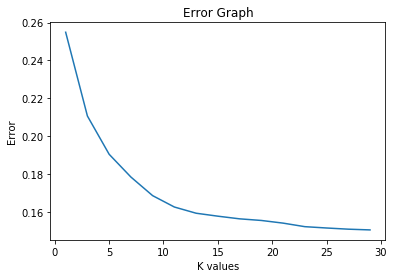

The optimal value of k is 29

****Test accuracy for k = 29 is 83%

 Test f1_score for k = 29 is 0.9113941433


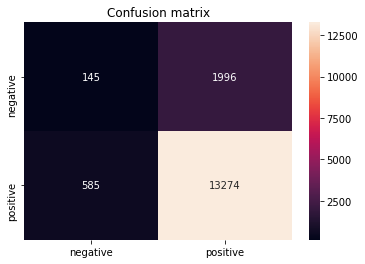

In [125]:
import warnings
warnings.filterwarnings("ignore")
import warnings
warnings.filterwarnings("ignore")
#Brute Force KNN on TFIDFW2V
print("Running KNN using bRUTE FORCE on TFIDF W2V Vectorized data")

accuracy=0.0
neigh=1
f1score=0.0
kvalues=[]
error=[]
#Finding best parameters using Simple Cross Validation
for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree')

    # fitting the model on crossvalidation train
    knn.fit(X_train, Y_train)

    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv)

    # evaluate CV accuracy
    accu=accuracy_score(Y_cv, pred, normalize=True)
    acc = accuracy_score(Y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))
    f1=f1_score(Y_cv, pred, average='binary',pos_label='positive')
    print('\nCV f1_score for k = %d is %.10f' % (i, f1))
    #calculating error
    err=1-accu
    print("Error value : %.5f"%(err))
    error.append(err)
    kvalues.append(i)
    
    if (f1score<=f1):
        f1score=f1
        neigh=i
    else:
        pass

plt.figure()
plt.plot(kvalues,error)
plt.title("Error Graph")
plt.xlabel('K values')
plt.ylabel('Error')
plt.show()   
print ("The optimal value of k is %d"%(neigh))   
knn = KNeighborsClassifier(n_neighbors=neigh,algorithm='kd_tree')
knn.fit(X_train,Y_train)
pred = knn.predict(X_test)
acc = accuracy_score(Y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = %d is %d%%' % (neigh,acc))
f1=f1_score(Y_test, pred,average='binary',pos_label='positive')
print('\n Test f1_score for k = %d is %.10f' % (neigh, f1))
cm=confusion_matrix(Y_test,pred)
df_cm = pd.DataFrame(cm,index=["negative","positive"],columns=["negative","positive"])
plt.figure()
plt.title("Confusion matrix")
sns.heatmap(df_cm, annot=True,fmt="d")


Running KNN using KD Tree on TFIDF W2V Vectorized data

CV accuracy for k = 1 is 74%

CV f1_score for k = 1 is 0.8448775850
Error value : 0.25492

CV accuracy for k = 3 is 78%

CV f1_score for k = 3 is 0.8776991472
Error value : 0.21062

CV accuracy for k = 5 is 80%

CV f1_score for k = 5 is 0.8918954886
Error value : 0.19039

CV accuracy for k = 7 is 82%

CV f1_score for k = 7 is 0.9001006432
Error value : 0.17836

CV accuracy for k = 9 is 83%

CV f1_score for k = 9 is 0.9066597430
Error value : 0.16852

CV accuracy for k = 11 is 83%

CV f1_score for k = 11 is 0.9105914718
Error value : 0.16250

CV accuracy for k = 13 is 84%

CV f1_score for k = 13 is 0.9127344352
Error value : 0.15922

CV accuracy for k = 15 is 84%

CV f1_score for k = 15 is 0.9137754230
Error value : 0.15766

CV accuracy for k = 17 is 84%

CV f1_score for k = 17 is 0.9148138683
Error value : 0.15625

CV accuracy for k = 19 is 84%

CV f1_score for k = 19 is 0.9153797064
Error value : 0.15539

CV accuracy for k = 21 i

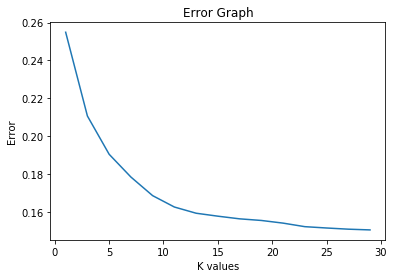

The optimal value of k is 29

****Test accuracy for k = 29 is 83%

 Test f1_score for k = 29 is 0.9113941433


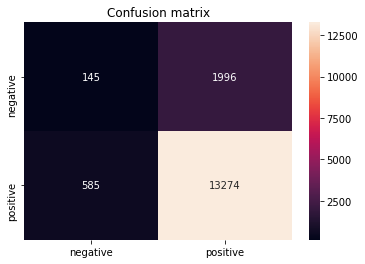

In [126]:
import warnings
warnings.filterwarnings("ignore")
print("Running KNN using KD Tree on TFIDF W2V Vectorized data")

accuracy=0.0
neigh=1
f1score=0.0
kvalues=[]
error=[]
#Finding best parameters using Simple Cross Validation
for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='kd_tree')

    # fitting the model on crossvalidation train
    knn.fit(X_train, Y_train)

    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv)

    # evaluate CV accuracy
    accu=accuracy_score(Y_cv, pred, normalize=True)
    acc = accuracy_score(Y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))
    f1=f1_score(Y_cv, pred, average='binary',pos_label='positive')
    print('\nCV f1_score for k = %d is %.10f' % (i, f1))
    #calculating error
    err=1-accu
    print("Error value : %.5f"%(err))
    error.append(err)
    kvalues.append(i)
    
    if (f1score<=f1):
        f1score=f1
        neigh=i
    else:
        pass

plt.figure()
plt.plot(kvalues,error)
plt.title("Error Graph")
plt.xlabel('K values')
plt.ylabel('Error')
plt.show()   
print ("The optimal value of k is %d"%(neigh))   
knn = KNeighborsClassifier(n_neighbors=neigh,algorithm='kd_tree')
knn.fit(X_train,Y_train)
pred = knn.predict(X_test)
acc = accuracy_score(Y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = %d is %d%%' % (neigh,acc))
f1=f1_score(Y_test, pred,average='binary',pos_label='positive')
print('\n Test f1_score for k = %d is %.10f' % (neigh, f1))
cm=confusion_matrix(Y_test,pred)
df_cm = pd.DataFrame(cm,index=["negative","positive"],columns=["negative","positive"])
plt.figure()
plt.title("Confusion matrix")
sns.heatmap(df_cm, annot=True,fmt="d")


### Conclusion

In [21]:
from prettytable import PrettyTable

x = PrettyTable(["Vectorizer","Model","Hyperparameter/K","Accuracy","F1 Score"])
x.add_row(['BOW','Brute Force',29,'86%',0.927])
x.add_row(['BOW','KD Tree',29,'86%',0.927])
x.add_row(['TFIDF','Brute Force',29,'85%',0.922])
x.add_row(['TFIDF','KD Tree',29,'85%',0.922])
x.add_row(['W2V','Brute Force',29,'79%',0.881])
x.add_row(['W2V','KD Tree',29,'79%',0.881])
x.add_row(['TFIDFW2V','Brute Force',29,'83%',0.911])
x.add_row(['TFIDFW2V','KD Treee',29,'83%',0.911])
print(x)


+------------+-------------+------------------+----------+----------+
| Vectorizer |    Model    | Hyperparameter/K | Accuracy | F1 Score |
+------------+-------------+------------------+----------+----------+
|    BOW     | Brute Force |        29        |   86%    |  0.927   |
|    BOW     |   KD Tree   |        29        |   86%    |  0.927   |
|   TFIDF    | Brute Force |        29        |   85%    |  0.922   |
|   TFIDF    |   KD Tree   |        29        |   85%    |  0.922   |
|    W2V     | Brute Force |        29        |   79%    |  0.881   |
|    W2V     |   KD Tree   |        29        |   79%    |  0.881   |
|  TFIDFW2V  | Brute Force |        29        |   83%    |  0.911   |
|  TFIDFW2V  |   KD Treee  |        29        |   83%    |  0.911   |
+------------+-------------+------------------+----------+----------+


Complete